In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Conv2D
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


2024-05-30 09:28:40.588877: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 09:28:40.588986: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 09:28:40.720642: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt


def plot_accuracy(history):
    plt.plot(history.history["accuracy"], label="train")
    plt.plot(history.history["val_accuracy"], label="validation")
    plt.legend()
    plt.show()


def plot_loss(history):
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="validation")
    plt.legend()
    plt.show()


def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

In [3]:
train_ds = image_dataset_from_directory(
    directory="/kaggle/input/cars-image-dataset/Cars Dataset/train",
    labels="inferred",
    label_mode="int",
    batch_size=64,
    image_size=(256, 256),
)


test_ds = image_dataset_from_directory(
    directory="/kaggle/input/cars-image-dataset/Cars Dataset/test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),
)

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

Found 3352 files belonging to 7 classes.
Found 813 files belonging to 7 classes.


# **EFFICENTNET**

In [4]:
efficientnet = EfficientNetB0(include_top=False, input_shape=(256, 256, 3), classes=8)

efficientnet.trainable = True
model1 = Sequential([
    efficientnet,
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.1),
    Dense(256, activation="relu"),
    Dropout(0.1),
    Dense(128, activation="relu"),
    Dropout(0.1),
    Dense(100, activation="softmax")
])

model1.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

callback = EarlyStopping(monitor="loss", patience=7)
history = model1.fit(
    train_ds,
    epochs=100,
    batch_size=32,
    callbacks=[callback],
    validation_data=test_ds,
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


I0000 00:00:1717061442.162478     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


53/53 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.4094 - loss: 3.3892 - val_accuracy: 0.0824 - val_loss: 2.5052
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.9295 - loss: 0.2353 - val_accuracy: 0.2448 - val_loss: 4.4481
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.9751 - loss: 0.0928 - val_accuracy: 0.2448 - val_loss: 4.3547
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.9846 - loss: 0.0562 - val_accuracy: 0.1082 - val_loss: 3.3654
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.9722 - loss: 0.0923 - val_accuracy: 0.1697 - val_loss: 3.6689
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 21s 284ms/step - accuracy: 0.9845 - loss: 0.0463 - val_accuracy: 0.1968 - val_loss: 2.4331
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.9808 - loss: 0.0551 - val_accuracy: 0.3173 - val_loss: 2.0336
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.9795 - loss: 0.0871 - val_accuracy: 

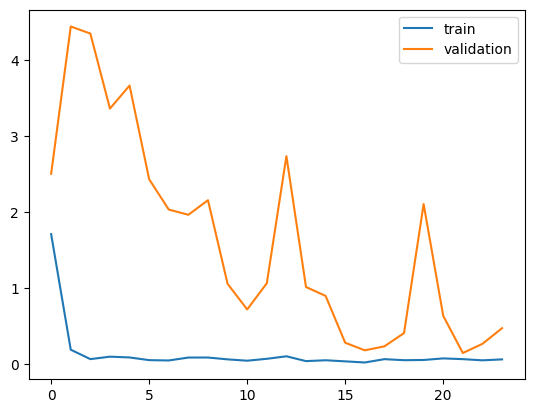

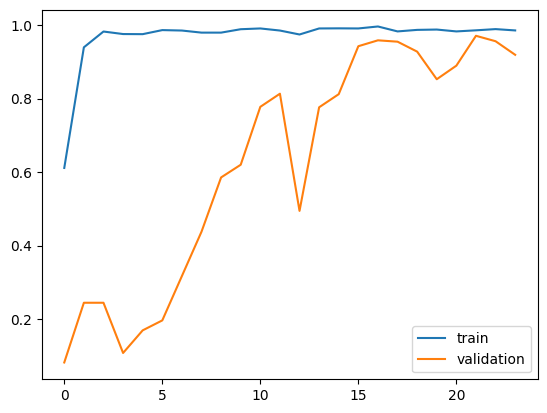

26/26 - 1s - 46ms/step - accuracy: 0.9188 - loss: 0.4698
Test Accuracy: 0.9188191890716553


In [5]:
plot_loss(history)
plot_accuracy(history)
test_loss, test_acc = model1.evaluate(test_ds, verbose=2)
print("Test Accuracy:", test_acc)

# **DenseNet**

In [6]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

densenet = DenseNet121(
    input_shape=(256, 256, 3), include_top=False, weights="imagenet", classes=8
)

densenet.trainable = False
model2 = Sequential()
model2.add(densenet)
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dropout(0.1))
model2.add(Dense(256, activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(128, activation="relu"))
model2.add(Dropout(0.1))
model2.add(Dense(100, activation="softmax"))

model2.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

callback = EarlyStopping(monitor="loss", patience=7)
history = model2.fit(
    train_ds,
    epochs=100,
    batch_size=32,
    callbacks=[callback],
    validation_data=test_ds,
)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.3222 - loss: 4.1637 - val_accuracy: 0.7921 - val_loss: 0.6071
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.7998 - loss: 0.6024 - val_accuracy: 0.9077 - val_loss: 0.3201
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 148ms/step - accuracy: 0.9078 - loss: 0.2935 - val_accuracy: 0.9090 - val_loss: 0.2691
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.9522 - loss: 0.1817 - val_accuracy: 0.9225 - val_loss: 0.3028
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 150ms/step - accuracy: 0.9485 - loss: 0.1652 - val_accuracy: 0.9225 - val_loss: 0.2681
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 147ms/step - accuracy: 0.9703 - loss: 0.0881 - val_accuracy: 0.9385 - val_loss: 0.2514
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.9802 - loss: 0.0570 - val_accuracy: 0.9250 - val_loss: 0.2497
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 149m

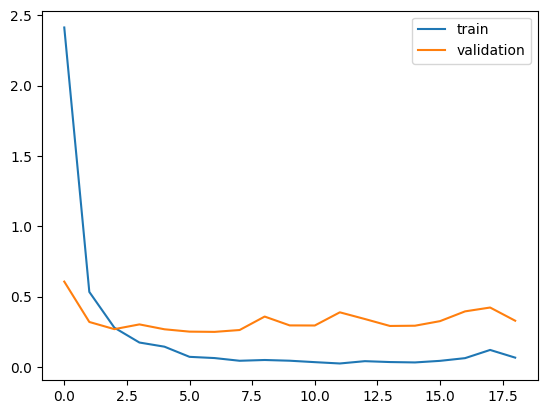

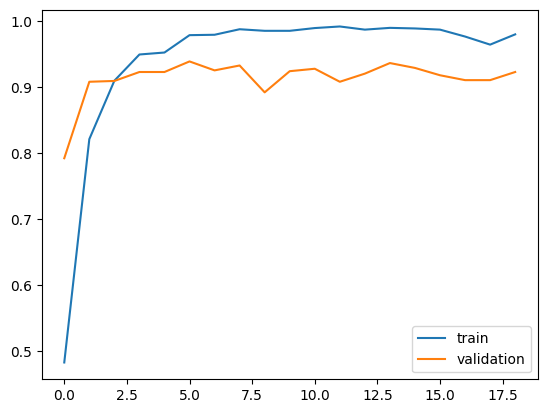

26/26 - 2s - 68ms/step - accuracy: 0.9225 - loss: 0.3290
Test Accuracy: 0.9225092530250549


In [7]:
plot_loss(history)
plot_accuracy(history)
test_loss, test_acc = model2.evaluate(test_ds, verbose=2)
print("Test Accuracy:", test_acc)

# **VGG19**

In [8]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dropout, Dense, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Define the VGG19 model
vgg19 = VGG19(
    input_shape=(256, 256, 3), include_top=False, weights="imagenet", classes=8
)

vgg19.trainable = False
model3 = Sequential()
model3.add(vgg19)
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dropout(0.1))
model3.add(Dense(256, activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(128, activation="relu"))
model3.add(Dropout(0.1))
model3.add(Dense(100, activation="softmax"))

model3.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

callback = EarlyStopping(monitor="loss", patience=7)
history = model3.fit(
    train_ds,
    epochs=100,
    batch_size=32,
    callbacks=[callback],
    validation_data=test_ds,
)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100


2024-05-30 09:42:44.170043: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng15{k5=1,k6=0,k7=1,k10=1} for conv (f32[64,64,256,256]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,3,256,256]{3,2,1,0}, f32[64,3,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"conv_result_scale":1,"activation_mode":"kRelu","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-30 09:42:45.013984: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 2.97774, expected 2.11937
2024-05-30 09:42:45.014035: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.05083, expected 3.19246
2024-05-30 09:42:45.014044: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.52967, expected 3.6713
2024-05-30 09:42:45.014052: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Di

52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.3072 - loss: 2.5881

2024-05-30 09:43:35.846985: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 3.32017, expected 2.40063
2024-05-30 09:43:35.847040: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 4.56158, expected 3.64204
2024-05-30 09:43:35.847050: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 4.87333, expected 3.95378
2024-05-30 09:43:35.847057: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.04232, expected 5.12277
2024-05-30 09:43:35.847065: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 6.6563, expected 5.73676
2024-05-30 09:43:35.847073: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 6.88616, expected 5.96662
2024-05-30 09:43:35.847081: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.61428, expected 5.69474
2024-05-30 09:43:35.847088: E external/local_xla/xla/ser

53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.3098 - loss: 2.5733

2024-05-30 09:43:55.615564: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65536: 3.31777, expected 2.61172
2024-05-30 09:43:55.615629: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65537: 5.10329, expected 4.39724
2024-05-30 09:43:55.615639: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65538: 4.80913, expected 4.10308
2024-05-30 09:43:55.615647: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65544: 5.33366, expected 4.62762
2024-05-30 09:43:55.615655: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65545: 5.00267, expected 4.29663
2024-05-30 09:43:55.615663: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65546: 4.93559, expected 4.22954
2024-05-30 09:43:55.615670: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65547: 5.39283, expected 4.68678
2024-05-30 09:43:55.615678:

53/53 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.3122 - loss: 2.5591 - val_accuracy: 0.5978 - val_loss: 1.1538
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.6235 - loss: 1.0395 - val_accuracy: 0.6150 - val_loss: 1.1547
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.7668 - loss: 0.6976 - val_accuracy: 0.7060 - val_loss: 0.8952
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - accuracy: 0.8039 - loss: 0.5741 - val_accuracy: 0.4342 - val_loss: 2.2323
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - accuracy: 0.7983 - loss: 0.6060 - val_accuracy: 0.5941 - val_loss: 1.7656
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.7932 - loss: 0.7337 - val_accuracy: 0.4883 - val_loss: 1.8970
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.8485 - loss: 0.4974 - val_accuracy: 0.4551 - val_loss: 2.1401
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 13s 242ms/step - accuracy: 0.8410 - loss: 0.4801 - val_accuracy: 

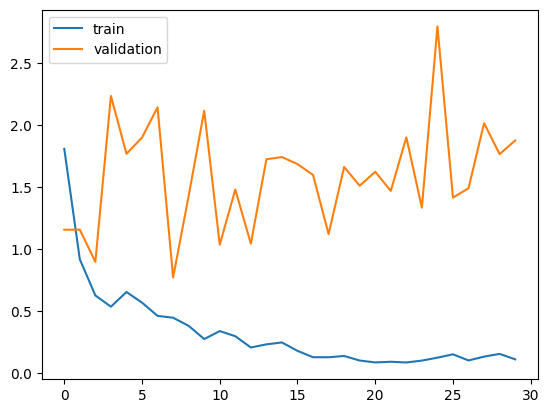

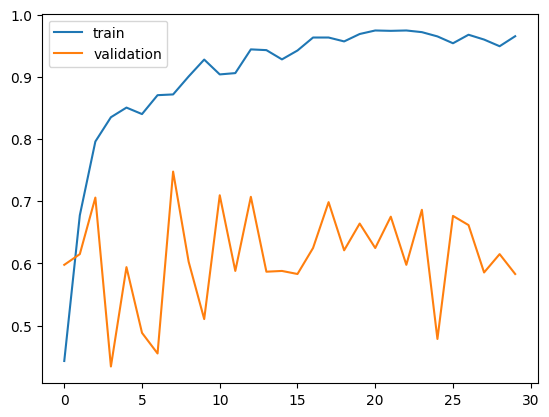

26/26 - 3s - 103ms/step - accuracy: 0.5806 - loss: 1.8818
Test Accuracy: 0.5805658102035522


In [9]:
plot_loss(history)
plot_accuracy(history)
test_loss, test_acc = model3.evaluate(test_ds, verbose=2)
print("Test Accuracy:", test_acc)

# **ResNet**

In [10]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras import Sequential
resnet = ResNet50V2(
    input_shape=(256,256, 3), include_top=False, weights="imagenet", classes=8
)
resnet.trainable = False
model4 = Sequential()
model4.add(resnet)
model4.add(Flatten())
model4.add(Dropout(0.1))
model4.add(Dense(256, activation="leaky_relu"))
model4.add(Dropout(0.1))
model4.add(Dense(128, activation="leaky_relu"))
model4.add(Dropout(0.1))
model4.add(Dense(100, activation="softmax"))

model4.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

callback = EarlyStopping(monitor="loss", patience=7)
history = model4.fit(
    train_ds,
    epochs=100,
    batch_size=32,
    callbacks=[callback],
    validation_data=test_ds,
)

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 59s 651ms/step - accuracy: 0.4641 - loss: 10.4720 - val_accuracy: 0.8622 - val_loss: 0.8775
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9139 - loss: 0.4782 - val_accuracy: 0.8413 - val_loss: 0.8921
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9516 - loss: 0.2221 - val_accuracy: 0.8831 - val_loss: 0.7134
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9796 - loss: 0.0706 - val_accuracy: 0.8868 - val_loss: 0.8786
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9815 - loss: 0.0617 - val_accuracy: 0.8856 - val_loss: 0.9029
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.9889 - loss: 0.0542 - val_accuracy: 0.8561 - val_loss: 1.1444
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 130ms/step - accuracy: 0.9886 - loss: 0.0489 - val_accuracy: 0.8733 - val_loss: 1.0756
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 7s 13

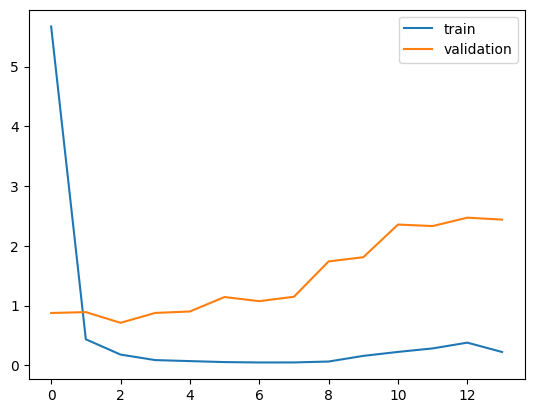

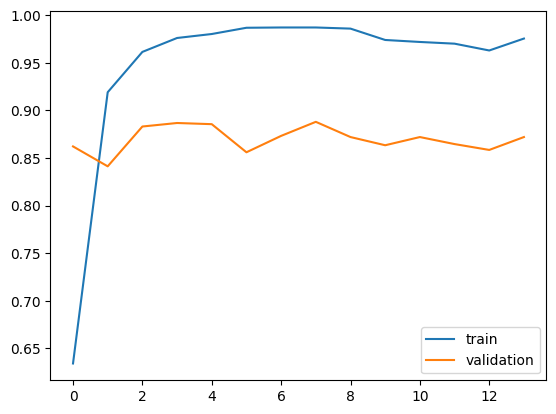

26/26 - 2s - 58ms/step - accuracy: 0.8721 - loss: 2.4401
Test Accuracy: 0.8720787167549133


In [11]:
plot_loss(history)
plot_accuracy(history)
test_loss, test_acc = model4.evaluate(test_ds, verbose=2)
print("Test Accuracy:", test_acc)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = "/kaggle/input/cars-image-dataset/Cars Dataset/test/Toyota Innova/1030.jpg"
img = image.load_img(img_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array/=255.0
# img_array = preprocess_input(img_array)

# Make predictions
# predictions = model.predict(img_array)

# Decode the predictions
predicted_class = np.argmax(model2.predict(img_array),axis=1)
# confidence = predictions[0][predicted_class]

# Display the results
plt.imshow(img)
plt.axis('off')
print(predicted_class)
plt.show()
if predicted_class == 0:
    print("Audi")
elif predicted_class == 1:
    print("Hyundai")
elif predicted_class == 2:
        print("Mahindra")
elif predicted_class == 3:
        print("RR")
elif predicted_class == 4:
        print("Maruti")
elif predicted_class == 5:
        print("Tata")
elif predicted_class == 6:
        print("Toyota")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


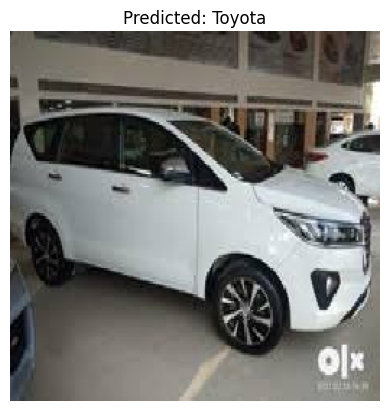

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


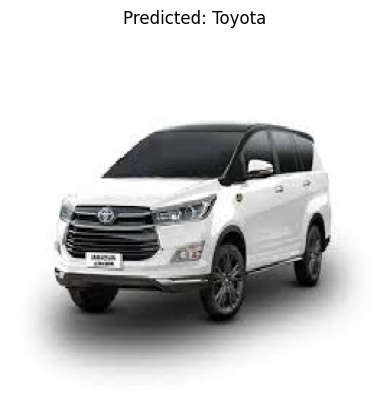

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


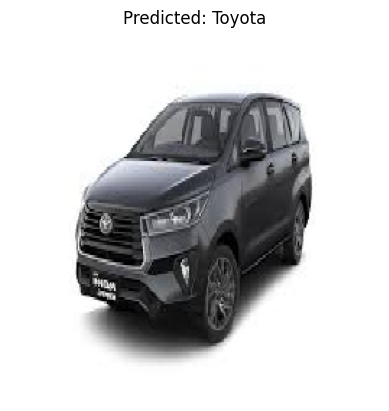

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


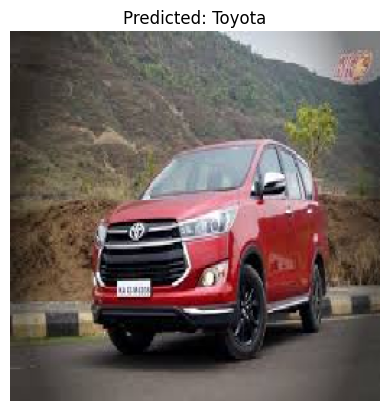

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


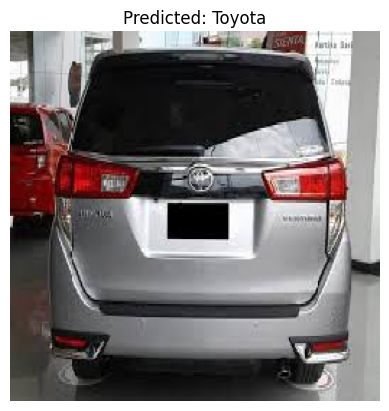

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


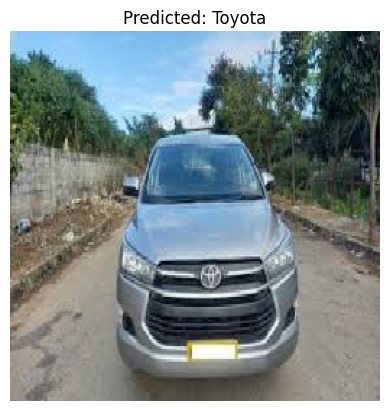

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


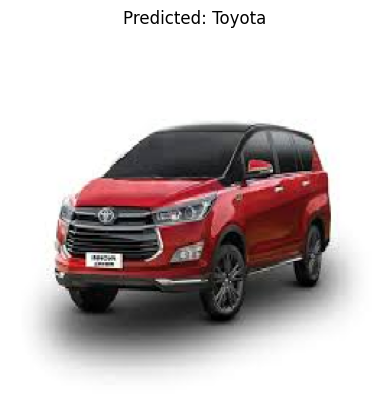

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


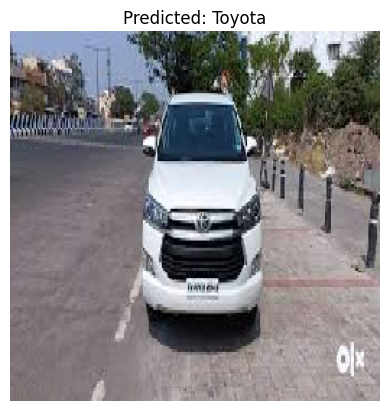

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


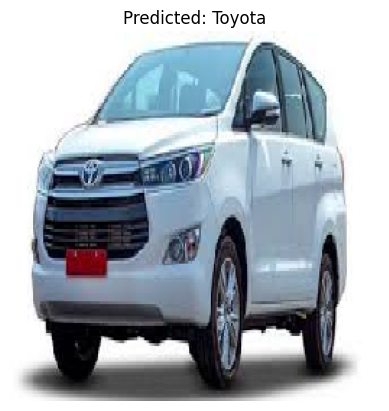

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


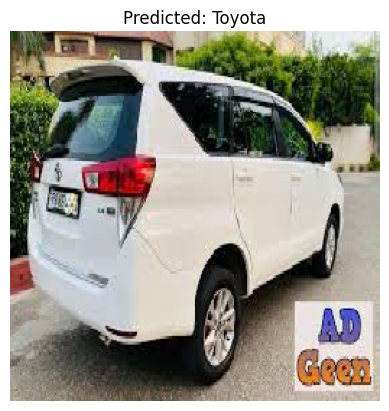

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


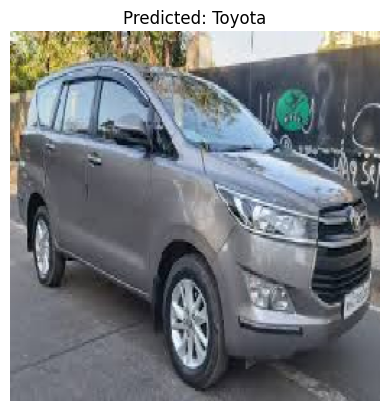

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


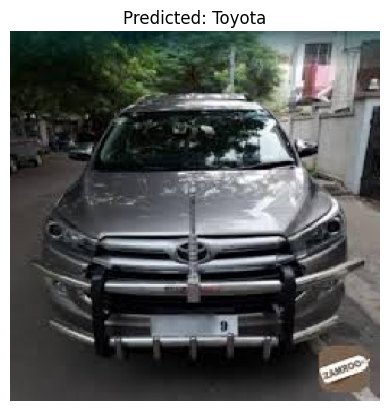

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


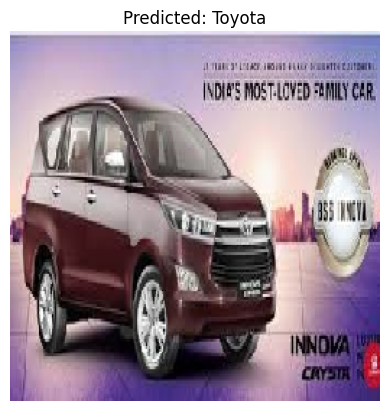

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


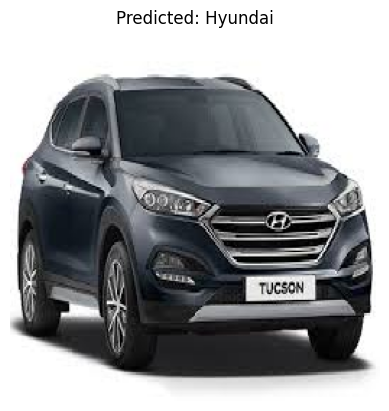

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


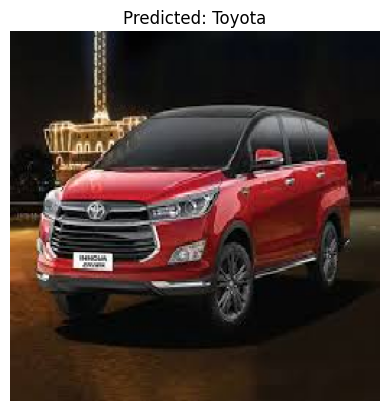

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


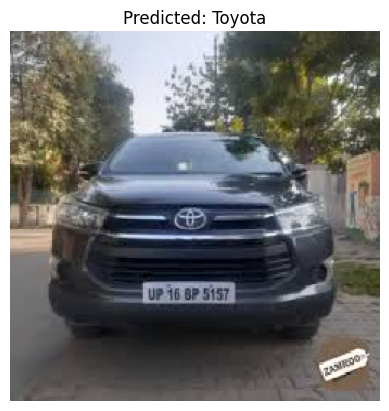

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


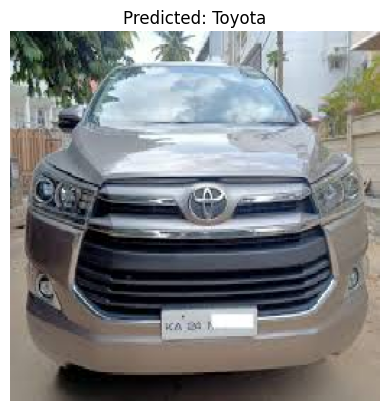

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


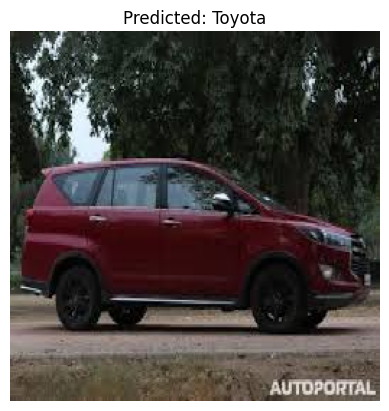

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


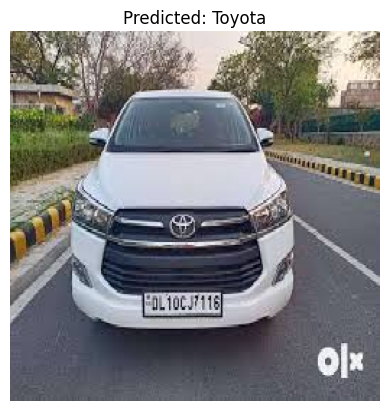

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


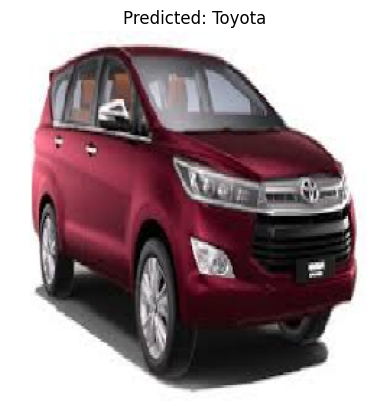

In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import random
import matplotlib.pyplot as plt

# Path to the test dataset directory
test_dir = "/kaggle/input/cars-image-dataset/Cars Dataset/test/Toyota Innova"

# Filter out directories from the list of files
test_files = [file for file in os.listdir(test_dir) if os.path.isfile(os.path.join(test_dir, file))]

# Randomly select 10 images
random_images = random.sample(test_files, min(20, len(test_files)))

for img_name in random_images:
    # Form the complete path to the image
    img_path = os.path.join(test_dir, img_name)
    
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    # Make predictions
    predicted_class = np.argmax(model1.predict(img_array), axis=1)
    
    # Display the results
    plt.imshow(img)
    plt.axis('off')
    
    # Determine the predicted class and display it
    if predicted_class == 0:
        plt.title("Predicted: Audi")
    elif predicted_class == 1:
        plt.title("Predicted: Hyundai")
    elif predicted_class == 2:
        plt.title("Predicted: Mahindra")
    elif predicted_class == 3:
        plt.title("Predicted: RR")
    elif predicted_class == 4:
        plt.title("Predicted: Maruti")
    elif predicted_class == 5:
        plt.title("Predicted: Tata")
    elif predicted_class == 6:
        plt.title("Predicted: Toyota")
    
    plt.show()


In [44]:
pip install gradio

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 82.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 89.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.3 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=5584 sha256=a371e9662bb28f52439dc53091e0d1b220afc1f9628b67929dc78ea12b54b063
  Stored in directory: /root/.cache/pip/wheels/bd/65/9a/671fc6dcde07d4418df0c592f8df512b26d7a0029c2a23dd81
Successfully built ffmpy
  Attempting uninstall: websockets
    Found existing installation: websockets 12.0
    Uninstalling websockets-12.0:
      Successfully uninstalled websockets-12.0
  Attempting uninst

In [51]:
import tensorflow as tf

inception_net = tf.keras.applications.MobileNetV2()

14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [52]:
import requests

# Download human-readable labels for ImageNet.
response = requests.get("https://git.io/JJkYN")
labels = response.text.split("\n")

def classify_image(inp):
  inp = inp.reshape((-1, 224, 224, 3))
  inp = tf.keras.applications.mobilenet_v2.preprocess_input(inp)
  prediction = inception_net.predict(inp).flatten()
  confidences = {labels[i]: float(prediction[i]) for i in range(1000)}
  return confidences

TypeError: Image.__init__() got an unexpected keyword argument 'shape'